## Final Project Submission

Please fill out:
* Student name: Carlos Marin
* Student pace: self paced / part time / full time: PART TIME
* Scheduled project review date/time: 21 JAN 2022
* Instructor name: ABHINEET KULKARNI
* Blog post URL:


# Movie Success Analysis 
The Purpose of this project is to see how movie ratings is tied to movie financial success. I analyze genres of movies provided and their success rate. Do certain genres have higher success rate than others? Do certain Genres sell more than others? I answer these questions and more. 

## Importing important packages
#### Making it easier to read file names

In [2]:


#importing data using glob
import os
from glob import glob
import pandas as pd

csv_files = glob("./zippedData/*.csv.gz")
csv_files

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")  #cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df


In [ ]:
csv_files_dict.keys()

#### movie titles data set used
movie_titles = csv_files_dict['imdb_title_basics_gz']

#### movie budget data set used
movie_budgets = csv_files_dict['tn_movie_budgets_gz']

#### Title Ratings Data Set Used
title_ratings = csv_files_dict['imdb_title_ratings_gz']

## Data Understanding
#### Movie Budgets Data
The Movie Budgets Data contains the movie name, release data, budget and its domestic and worldwide gross.

In [184]:
movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


#### Movie Titles Data Set
The Movie titles data contains the title of the movies, start year, runtime, and the genre associated with the movie.

In [185]:
movie_titles

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


#### Title Ratings Data Set
The Title Ratings data set contains average rating, and the the number of votes. 
It also contains a variable called 'tconst' which will be used to merge data sets later.

In [12]:
title_ratings

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


## Data Engineering
In this section, we will start to make appropriate changes to the data sets.
We will rename columns, merge data sets, and drop columns that are unnecessary to the analysis.


First, we will make a new data set called movie ratings. This will be done by merging data sets movie titles
and the title ratings data set. They will be merged on the variable 'tconst'

In [7]:
movie_ratings = pd.merge(movie_titles, title_ratings, on='tconst')

In [8]:
movie_ratings

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


### Renaming movie_ratings columns
Once the merge has been completed, we can see the entire data frame seen above. In my next step we 
rename some of the columns to make it easier to understand. First we change 'Primary_title' to 'movie', the 
primary reason for this is to merge our next data set together since they will share the same column name.
We also rename 'averagerating' to 'average_rating', this is simply to make it easier to read.

In [11]:
movie_ratings.rename(columns= {'primary_title' : 'movie', 'averagerating': 'average_rating'} , inplace = True )

### merging to make full data set
We will merge the movie_ratings data set with the movie_budgets data frame. We merge on the column 'movie'.

In [19]:
FULLMOVIE = pd.merge(movie_budgets, movie_ratings, on = 'movie')

In [20]:
FULLMOVIE

,release_date,movie,production_budget,domestic_gross,worldwide_gross,original_title,start_year,runtime_minutes,genres,average_rating,numvotes
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Abatâ,2011,93.0,Horror,6.1,43
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...
2870,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,Stories of Our Lives,2014,60.0,Drama,7.5,85
2871,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",Cure,2011,93.0,Drama,4.9,11
2872,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",Newlyweds,2011,95.0,"Comedy,Drama",6.4,1436
2873,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43


### Final Data frame, now time to clean it up!
Once the final drame is made. We will drop all the unnecessary columns. We drop the release date, original title, 
start year, and the number of votes it received.

In [21]:
FULLMOVIE= FULL_MOVIE.drop(columns=['release_date','original_title', 'start_year', 'runtime_minutes','numvotes'])

In [22]:
FULLMOVIE

,movie,production_budget,domestic_gross,worldwide_gross,genres,average_rating
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror,6.1
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","Action,Adventure,Fantasy",6.6
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi",6.0
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action,Adventure,Sci-Fi",7.3
4,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200","Action,Adventure,Sci-Fi",8.5
...,...,...,...,...,...,...
2870,Stories of Our Lives,"$15,000",$0,$0,Drama,7.5
2871,Cure,"$10,000","$94,596","$94,596",Drama,4.9
2872,Newlyweds,"$9,000","$4,584","$4,584","Comedy,Drama",6.4
2873,Red 11,"$7,000",$0,$0,"Horror,Sci-Fi,Thriller",5.6


### Converting Money to Integers, what?!?
Unfortunately the Python system, doesn't read money values quite well. Therefore, we have to convert the money values 
into integers, we get of any dollar signs ($) and commas. This will help with performing our next step of 
analysis.

In [23]:
FULLMOVIE["production_budget"] = FULLMOVIE["production_budget"].replace('[\$\,\.]',"",regex=True).astype(int)

In [24]:
FULLMOVIE["domestic_gross"] = FULLMOVIE["domestic_gross"].replace('[\$\,\.]',"",regex=True).astype(int)

In [25]:
FULLMOVIE["worldwide_gross"] = FULLMOVIE["worldwide_gross"].replace('[\$\,\.]',"",regex=True).astype(int)

### Creating new column Return On Investment (ROI) Percentage
Here I create the column, ROI Percentage,'ROI_Percentage'. The Formula for ROI Percentage is as follows:
    
   ROI % =  (Retuns/Investment) * 100  
    
    or this in case it will be :
    
     ROI % = (worldwide_gross/ Production_budget) * 100
        
    Now this will give you a value, over 100 % if your profits exceeds the cost of the movie. We see by how much it 
    exceeds.

In [28]:
FULLMOVIE["ROI_Percentage"] = (FULLMOVIE["worldwide_gross"]/FULLMOVIE["production_budget"])*100

In [29]:
FULLMOVIE

,movie,production_budget,domestic_gross,worldwide_gross,genres,average_rating,ROI_Percentage
0,Avatar,425000000,760507625,2776345279,Horror,6.1,653.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",6.6,254.667286
2,Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi",6.0,42.789243
3,Avengers: Age of Ultron,330600000,459005868,1403013963,"Action,Adventure,Sci-Fi",7.3,424.384139
4,Avengers: Infinity War,300000000,678815482,2048134200,"Action,Adventure,Sci-Fi",8.5,682.711400
...,...,...,...,...,...,...,...
2870,Stories of Our Lives,15000,0,0,Drama,7.5,0.000000
2871,Cure,10000,94596,94596,Drama,4.9,945.960000
2872,Newlyweds,9000,4584,4584,"Comedy,Drama",6.4,50.933333
2873,Red 11,7000,0,0,"Horror,Sci-Fi,Thriller",5.6,0.000000


### Data Analysis
In this section, we start performing data analysis. First I perform value counts, using the top 5 genres we 
use those genres to measure their average rating and ROI Percentage return.

In [30]:
FULLMOVIE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2875 non-null   object 
 1   production_budget  2875 non-null   int64  
 2   domestic_gross     2875 non-null   int64  
 3   worldwide_gross    2875 non-null   int64  
 4   genres             2867 non-null   object 
 5   average_rating     2875 non-null   float64
 6   ROI_Percentage     2875 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 179.7+ KB


In [31]:
FULLMOVIE['genres'].value_counts()

Drama                        319
Documentary                  126
Comedy                       108
Comedy,Drama                  93
Drama,Romance                 77
                            ... 
Adventure,Drama,Western        1
Adventure,Mystery,Sci-Fi       1
Family,Sci-Fi                  1
Action,Comedy,Documentary      1
Crime,Documentary,History      1
Name: genres, Length: 311, dtype: int64

### 5 Genres
Based on the value counts, the top genres are 'Drama', 'Documentary', 'Comedy', 'Comedy,Drama', 'Drama,Romance'.
Now we create new dataframes, where now they only contain the genre in question for analysis. 

In [32]:
FULLDRAMA= FULLMOVIE[FULLMOVIE['genres']== 'Drama']

In [33]:
FULLDOCS= FULLMOVIE[FULLMOVIE['genres']== 'Documentary']

In [34]:
FULLDR= FULLMOVIE[FULLMOVIE['genres']== 'Drama,Romance']

In [35]:
FULLCOMEDY =  FULLMOVIE[FULLMOVIE['genres']== 'Comedy']

In [36]:
FULLCD= FULLMOVIE[FULLMOVIE['genres']== 'Comedy,Drama']

### 5 Genres Average Rating
Basic statiscs of the 5 genres and the column average rating

In [38]:
FULLDRAMA['average_rating'].describe()

count    319.000000
mean       6.526959
std        1.108271
min        1.700000
25%        5.900000
50%        6.600000
75%        7.200000
max        9.100000
Name: average_rating, dtype: float64

In [40]:
FULLDR['average_rating'].describe()

count    77.000000
mean      6.511688
std       0.927926
min       4.100000
25%       5.900000
50%       6.800000
75%       7.200000
max       7.900000
Name: average_rating, dtype: float64

In [43]:
FULLDOCS['average_rating'].describe()

count    126.000000
mean       7.167460
std        0.955056
min        3.900000
25%        6.700000
50%        7.200000
75%        7.700000
max        9.300000
Name: average_rating, dtype: float64

In [44]:
FULLCOMEDY['average_rating'].describe()

count    108.000000
mean       5.885185
std        1.199129
min        3.300000
25%        5.200000
50%        5.900000
75%        6.525000
max        8.800000
Name: average_rating, dtype: float64

In [45]:
FULLCD['average_rating'].describe()

count    93.000000
mean      6.564516
std       0.794361
min       4.600000
25%       6.100000
50%       6.600000
75%       7.200000
max       8.800000
Name: average_rating, dtype: float64

### 5 Genres and ROI Percentage
Basic statistics on the column ROI Percentage for the 5 genres in question for analysis.

In [47]:
FULLDRAMA['ROI_Percentage'].describe()

count     319.000000
mean      393.514484
std      1127.882650
min         0.000000
25%        21.109340
50%       115.630900
75%       314.043708
max      8958.633600
Name: ROI_Percentage, dtype: float64

In [48]:
FULLDR['ROI_Percentage'].describe()

count      77.000000
mean      461.927443
std      1105.078664
min         0.000000
25%        47.406319
50%       171.678526
75%       394.144371
max      8958.633600
Name: ROI_Percentage, dtype: float64

In [49]:
FULLDOCS['ROI_Percentage'].describe()

count     126.000000
mean      243.775977
std       431.179548
min         0.000000
25%        10.742625
50%       131.191426
75%       271.989215
max      3682.433569
Name: ROI_Percentage, dtype: float64

In [50]:
FULLCOMEDY['ROI_Percentage'].describe()

count     108.000000
mean      260.442223
std       494.795024
min         0.000000
25%        11.571098
50%       153.621871
75%       308.838212
max      3309.289000
Name: ROI_Percentage, dtype: float64

In [51]:
FULLCD['ROI_Percentage'].describe()

count      93.000000
mean      287.049087
std       454.669268
min         0.000000
25%        24.463175
50%       152.339267
75%       341.715352
max      2575.494167
Name: ROI_Percentage, dtype: float64

### Basics stats for all columns and all genres

In [52]:
FULLMOVIE.groupby(['genres']).agg(['mean', 'median', 'count'])

production_budget                     \
                                        mean       median count   
genres                                                            
Action                          2.713958e+07   19500000.0    24   
Action,Adventure                9.250000e+06    9250000.0     2   
Action,Adventure,Animation      1.151471e+08  130000000.0    17   
Action,Adventure,Biography      7.100000e+07   65000000.0     5   
Action,Adventure,Comedy         8.023333e+07   87500000.0    30   
...                                      ...          ...   ...   
Sci-Fi,Thriller                 1.880400e+07   20000000.0     5   
Sport                           1.900000e+07   19000000.0     1   
Thriller                        2.928053e+07   16000000.0    43   
War                             4.000000e+07   40000000.0     1   
Western                         2.000000e+06    2000000.0     2   

                           domestic_gross                    worldwide_gross  \
                                     mean       median count            mean   
genres                                                                         
Action                       2.743524e+07   14797242.0    24    6.807342e+07   
Action,Adventure             5.887000e+03       5887.0     2    5.683002e+06   
Action,Adventure,Animation   1.567252e+08  149260504.0    17    4.374047e+08   
Action,Adventure,Biography   5.671719e+07   31445011.0     5    1.880822e+08   
Action,Adventure,Comedy      1.168099e+08   79237318.0    30    3.158433e+08   
...                                   ...          ...   ...             ...   
Sci-Fi,Thriller              1.817678e+07    5958315.0     5    2.340297e+07   
Sport                        5.310554e+06    5310554.0     1    5.745503e+06   
Thriller                     2.871587e+07   17142080.0    43    6.981514e+07   
War                          3.019910e+07   30199105.0     1    3.019910e+07   
Western                      9.000000e+03       9000.0     2    7.818100e+04   

                                              average_rating               \
                                 median count           mean median count   
genres                                                                      
Action                       32747664.5    24       5.516667   5.45    24   
Action,Adventure              5683002.0     2       6.350000   6.35     2   
Action,Adventure,Animation  494870992.0    17       7.429412   7.60    17   
Action,Adventure,Biography   89693309.0     5       7.120000   7.00     5   
Action,Adventure,Comedy     252039872.0    30       6.310000   6.40    30   
...                                 ...   ...            ...    ...   ...   
Sci-Fi,Thriller               8993300.0     5       5.260000   5.90     5   
Sport                         5745503.0     1       7.900000   7.90     1   
Thriller                     23894000.0    43       5.376744   5.20    43   
War                          30199105.0     1       2.800000   2.80     1   
Western                         78181.0     2       5.850000   5.85     2   

                           ROI_Percentage                    
                                     mean      median count  
genres                                                       
Action                         313.932637  153.012093    24  
Action,Adventure                40.681644   40.681644     2  
Action,Adventure,Animation     410.098117  395.228987    17  
Action,Adventure,Biography     236.653044  192.925235     5  
Action,Adventure,Comedy        398.508049  365.336561    30  
...                                   ...         ...   ...  
Sci-Fi,Thriller                 91.514465   35.973200     5  
Sport                           30.239489   30.239489     1  
Thriller                       454.291054  133.743308    43  
War                             75.497762   75.497762     1  
Western                          2.606033    2.606033     2  

[311 rows x 15 colu

## Data Visualization, comparison of ROI Percentage and and Average rating, using scatter plot.

In [55]:
import matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'ROI Percentage')

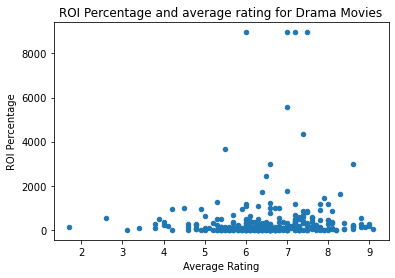

In [56]:
#Scatter Plot For Drama Movies
ax1 = FULLDRAMA.plot.scatter(x = 'average_rating', y = 'ROI_Percentage')
ax1.set_title('ROI Percentage and average rating for Drama Movies')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('ROI Percentage')

Text(0, 0.5, 'ROI Percentage')

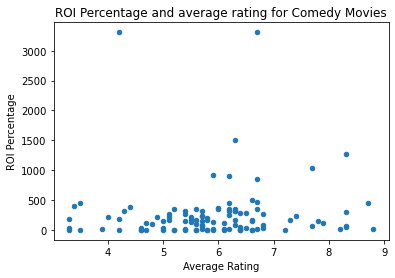

In [57]:
#Scatter Plot For Comedy Movies
ax3 = FULLCOMEDY.plot.scatter(x = 'average_rating', y = 'ROI_Percentage')
ax3.set_title('ROI Percentage and average rating for Comedy Movies')
ax3.set_xlabel('Average Rating')
ax3.set_ylabel('ROI Percentage')

Text(0, 0.5, 'ROI Percentage')

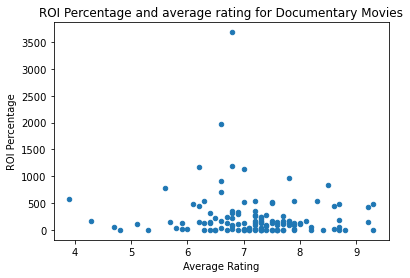

In [58]:
#Scatter Plot for Documentary 
ax2 = FULLDOCS.plot.scatter(x = 'average_rating', y = 'ROI_Percentage')
ax2.set_title('ROI Percentage and average rating for Documentary Movies')
ax2.set_xlabel('Average Rating')
ax2.set_ylabel('ROI Percentage')

Text(0, 0.5, 'ROI Percentage')

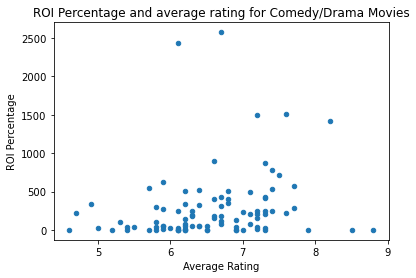

In [59]:
#Scatter Plot for Comedy/Drama 
ax1 = FULLCD.plot.scatter(x = 'average_rating', y = 'ROI_Percentage')
ax1.set_title('ROI Percentage and average rating for Comedy/Drama Movies')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('ROI Percentage')

Text(0, 0.5, 'ROI Percentage')

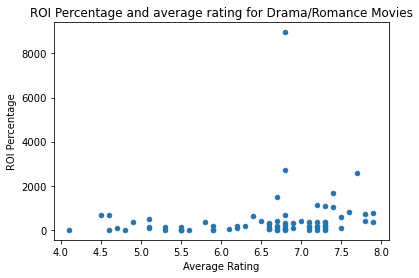

In [60]:
ax4 = FULLDR.plot.scatter(x = 'average_rating', y = 'ROI_Percentage')
ax4.set_title('ROI Percentage and average rating for Drama/Romance Movies')
ax4.set_xlabel('Average Rating')
ax4.set_ylabel('ROI Percentage')

### Conclusion
As expected, we we do see a general increase in ROI Percentage across all genres as the average rating increases. 
Unexpectedly some genres have higher ROI Outliers that do not fit the general trend of data. We would expect those
to be on the higher end of average rating, not in the middle section of average rating of charts.
Drama has both highest average rating and highest return on investment. While Comedy/Drama has the lowest average rating and return on investment.


### Next Steps...
- #### How can we increase ROI Percentage?
    Could Having potential more popular studios, directors, writers play a major role in movie success and overall?
- #### More Data in other Genres
    Low Data Counts for other Genres not mentioned such as Action, Fantasy, Horror. More Data is needed to perform 
    analysis on their success.
-#### Different measure of success
    Rather than measure ROI percentage and average rating. Measure average rating of success of certain directors in movie genres and compare how similar directors that work in that genre do.